# Random-graph UD-MIS (Classical)

$$H = -\sum_{i \in V} n_i + u \sum_{i,j \in E} n_i n_j$$

Our goal is to find one of the ground state(s) - a solution to the UD-MIS problem - automatically through Monte Carlo
sampling.

The probability distribution of the Ising model at temperature $T$ is given by the Gibbs distribution:

$$p(\sigma; T) = \frac{1}{Z(T)}\exp\left(-\frac{H(\sigma)}{T}\right)$$,

where $Z(T)$ is the normalization constant (also known as the *partition function*).

In this repo you'll find code for the UDMIS model of interest.
Strictly speaking, for the purposes of performing the Monte Carlo simulation we can simply compute the required energy
differences using two calls to the energy function.
However, we can often save significant computation time by writing a specialised function for the energy difference that
avoids unnecessary calculations.
Simply put, calculating the energy of a configuration of occupations requires you to iterate over all vertices in the
graph, but the energy change associated with a single-occupation-flip can be computed just from the values of the
connected vertices.

In [1]:
from src.udmis import *
from copy import deepcopy

u = 1.35
graph = [
    (0.3461717838632017, 1.4984640297338632),
    (0.6316400411846113, 2.5754677320579895),
    (1.3906262250927481, 2.164978861396621),
    (0.66436005100802, 0.6717919819739032),
    (0.8663329771713457, 3.3876341010035995),
    (1.1643107343501296, 1.0823066243402013)
]

udmis = UDMIS(u, graph)
udmis_init = deepcopy(udmis)

In [2]:
num_steps = 5000

T_i = 100
T_f = 0.01

temperature, energy = [], []
for n in range(num_steps):
    T = T_i * ((T_f/T_i) ** (n/num_steps))
    E = udmis.mc_step(T)
    if n % 100 == 0:
        temperature.append(T)
        energy.append(E)
    # print(n, E, udmis.occupations)

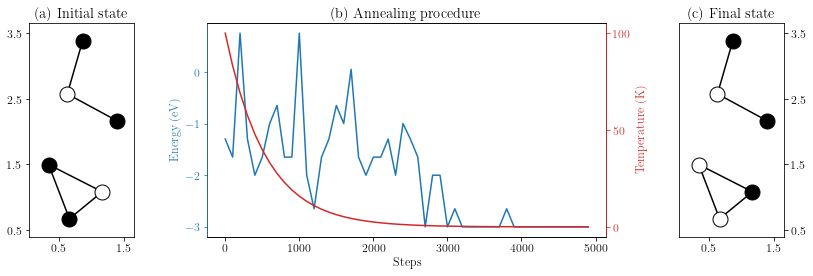

In [3]:
from src.figures import *

fig = plt.figure(figsize=(12, 4))

ax1 = plt.subplot2grid((1, 4), (0, 0))
ax2 = plt.subplot2grid((1, 4), (0, 1), colspan=2)
ax3 = plt.subplot2grid((1, 4), (0, 3))

plot_udmis(ax1, udmis_init)
plot_annealing(ax2, np.arange(0, num_steps, 100), energy, temperature)
plot_udmis(ax3, udmis)

ax1.set_title(r'(a) Initial state')
ax2.set_title(r'(b) Annealing procedure')
ax3.set_title(r'(c) Final state')
ax3.yaxis.tick_right()

fig.tight_layout()